# Fitur Bentuk
### Untuk fitur bentuk yang akan dibahas diambil dari paper [pada tautan ini](https://www.researchgate.net/publication/326893279_Perbandingan_Jaringan_Learning_Vector_Quantization_dan_Backpropagation_pada_Klasifikasi_Daun_Berbasiskan_Fitur_Gabungan?enrichId=rgreq-ff540f233aee2df9f0402d5842565c39-XXX&enrichSource=Y292ZXJQYWdlOzMyNjg5MzI3OTtBUzo2NTcyNTIzNTI1MzI0ODBAMTUzMzcxMjU4MDU5Ng%3D%3D&el=1_x_3&_esc=publicationCoverPdf).

## proses Thresholding
mengubah citra ke dalam bentuk BW


In [0]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("/content/drive/My Drive/citra_daun.tif")
img = cv.resize(img,(0,0), fx=0.3, fy=0.3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thr = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
thr=255-thr


### Tampilkan citra asli, grayscale dan BW


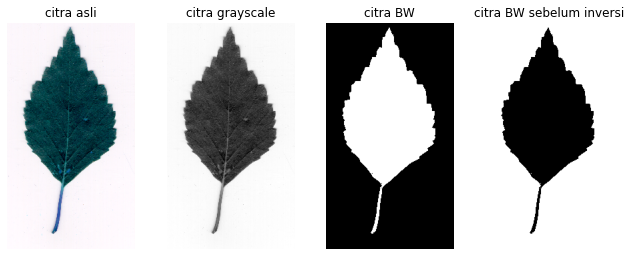

In [50]:
plt.figure(figsize=(9, 4))
plt.subplot(141)
plt.title('citra asli')
plt.imshow(img)
plt.axis('off')
plt.subplot(142)
plt.title('citra grayscale')
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.subplot(143)
plt.title('citra BW')
plt.imshow(thr, cmap='gray')
plt.axis('off')
plt.subplot(144)
plt.title('citra BW sebelum inversi')
plt.imshow(255-thr, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## pre-proses dengan menggunakan morfologi citra untuk menghilangkan bagian batang


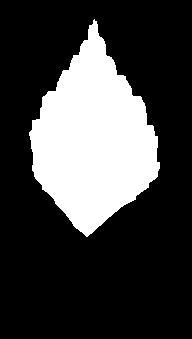

In [47]:
import numpy as np
# img = cv.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.dilate(thr,kernel,iterations = 1)
erosion = cv.erode(erosion,kernel,iterations = 3)
cv2_imshow(erosion)


## Deteksi Tepi

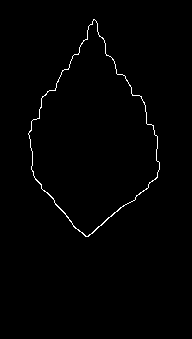

In [15]:
tepi = cv.Canny(erosion,100,100)
cv2_imshow(tepi)

## mendapatkan nilai keliling (P) dan Luas(D)


In [54]:
D = sum(np.ravel(erosion>0))
P = sum(np.ravel(tepi>0))

print ("P : ", P,"\nD : ", D)

P :  593 
D :  16476


In [55]:
roundness = 7*np.pi/(P**2)
Pd = P/D # D itu seharusnya diameter
compactness = P/np.sqrt(D)

print("roundness : ", roundness,
      "\nPd : ", Pd,
      "\ncompactness : ", compactness)

roundness :  6.253721345753451e-05 
Pd :  0.03599174556931294 
compactness :  4.619859859628058


## Mencari fitur Eccentricity

### mencari sumbu mayor dan minor untuk mendapatkan Eccintricity

In [56]:
jumKol = sum(tepi) 
jumBar = sum(np.transpose(tepi))

indekspan = np.where(jumBar>0)
indeksleb = np.where(jumKol>0)

panjang = indekspan[0][-1]-indekspan[0][0]
lebar = indeksleb[0][-1]-indeksleb[0][0]

print(panjang," ",lebar)

217   131


In [57]:
Eccentricity = np.sqrt(panjang**2 - lebar**2)/panjang
print("Eccentricity : ", Eccentricity)

Eccentricity :  0.7972217041587433


### mencari fitur AR, Rectangularity, narrow factor, PLW

In [58]:
print("AR = ", panjang/lebar,
      "\nRectangularity = ", D/(panjang*lebar),
      "\nNarrow_factor = ", D/panjang, # D disini itu diameter
      "\n𝑃𝐿𝑊 = ", P/(panjang+lebar))

AR =  1.6564885496183206 
Rectangularity =  0.5795898265733281 
Narrow_factor =  75.92626728110599 
𝑃𝐿𝑊 =  1.7040229885057472
